In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
class ElevatorEnv:
    def __init__(self,floors,max_cap,busy_prob,arrival_prob,dept_prob):
        #Initialisation of required variables
        self.floors = floors
        self.max_cap = max_cap
        self.busy_prob = busy_prob
        self.arrival_prob = arrival_prob
        self.dept_prob = dept_prob
        self.available_actions = [0,1,2,3]
        self.q_values = np.zeros((self.floors,self.max_cap+1,self.max_cap+1,len(self.available_actions)))
        self.epsilon = 0.1 #exploration rate
        self.gamma = 0.99 #discount factor
        self.alpha = 0.1 #learning rate
        self.waiting = 0 
        self.onboard = 0 
        self.current = 0
        self.episodes = 500
        #self.reward = 0
        self.actions={0:"MOVE UP",
                      1:"MOVE DOWN",
                      2:"STAY",
                      3:"LOAD_UNLOAD"}
        
    def reset(self):
        self.waiting = 0
        self.onboard = 0 
        self.current = 0
        #self.reward = 0 
        
    def epsilon_greedy(self,state): #epsilon greedy for makig best decision
        if random.uniform(0,1) < self.epsilon:
            return random.choice(self.available_actions)
        else : 
            return np.argmax(self.q_values[state])
    
    def perform_action(self,state,action): #Update the perform action.
        self.current,self.onboard,self.waiting = state
        reward = 0
            
        if action == 0 and state[0] < self.floors-1:
            self.current += 1
        elif action == 1 and self.current > 0:
            self.current -= 1
            
        
        if self.busy_prob > np.random.rand():
            new_floor = np.random.choice(self.floors,p = self.arrival_prob)
            if new_floor == self.current and self.max_cap > self.waiting:
                self.waiting += 1
        
        if action == 3:
            if self.onboard > 0 :
                departing = np.random.choice([True,False],size=self.onboard,p=[self.dept_prob[self.current],1-self.dept_prob[self.current]]).sum()
                reward += departing*10
                self.onboard -= departing
            
            if self.waiting > 0:
                available = self.max_cap - self.onboard
                picked_up = min(available,self.waiting)
                self.onboard += picked_up
                self.waiting-=picked_up
                
        if action in (0,1,2):
            reward -=(self.onboard+self.waiting)
            
        next_state = (self.current,self.onboard,self.waiting)
        return next_state,reward
    
    def q_learning(self):
        episode_rewards = []
        
        for episode in range(self.episodes):
            self.reset()
            state = (self.current,self.onboard,self.waiting)
            action = self.epsilon_greedy(state)
#             print(action)
            total_reward = 0
            
            for step in range(self.episodes):
                next_state,reward = self.perform_action(state,action)
#                 print(next_state)
                next_action = self.epsilon_greedy(next_state)
                self.q_values[state][action] += self.alpha*(reward + self.gamma * max(self.q_values[next_state])-(self.q_values[state][action]))
                
                state = next_state
                action = next_action
                total_reward += reward
            episode_rewards.append(total_reward)
            
        return episode_rewards
    def print_table(self):
        print(self.q_values)
    def policy_extraction(self):
        policy = np.argmax(self.q_values,axis = -1)
        for floor in range(self.floors):
            for onboard in range(self.max_cap+1):
                for waiting in range(self.max_cap+1):
                    state = (floor,onboard,waiting)
                    action = policy[state]
                    print(f"State: {state} Action: {self.actions[self.available_actions[action]]}")
        

In [5]:
def plot_graph(rewards):
    plt.plot(rewards)
    plt.xlabel('Rewards')
    plt.ylabel('Episodes')
    plt.title('Qlearning:Total Learning across episodes')

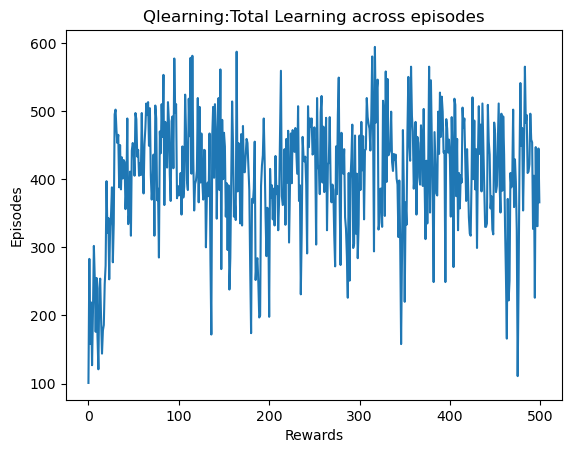

In [6]:
elevator = ElevatorEnv(floors=4,max_cap=3,busy_prob=0.2,arrival_prob=np.array([0.2, 0.1, 0.2, 0.5]),dept_prob=np.array([0.25, 0.25, 0.25, 0.25]))
rewards = elevator.q_learning()
plot_graph(rewards)

In [7]:
elevator.policy_extraction()

State: (0, 0, 0) Action: MOVE UP
State: (0, 0, 1) Action: LOAD_UNLOAD
State: (0, 0, 2) Action: MOVE DOWN
State: (0, 0, 3) Action: MOVE UP
State: (0, 1, 0) Action: LOAD_UNLOAD
State: (0, 1, 1) Action: MOVE DOWN
State: (0, 1, 2) Action: MOVE UP
State: (0, 1, 3) Action: MOVE UP
State: (0, 2, 0) Action: LOAD_UNLOAD
State: (0, 2, 1) Action: MOVE UP
State: (0, 2, 2) Action: MOVE UP
State: (0, 2, 3) Action: MOVE UP
State: (0, 3, 0) Action: LOAD_UNLOAD
State: (0, 3, 1) Action: MOVE DOWN
State: (0, 3, 2) Action: MOVE DOWN
State: (0, 3, 3) Action: MOVE DOWN
State: (1, 0, 0) Action: MOVE UP
State: (1, 0, 1) Action: LOAD_UNLOAD
State: (1, 0, 2) Action: LOAD_UNLOAD
State: (1, 0, 3) Action: MOVE UP
State: (1, 1, 0) Action: LOAD_UNLOAD
State: (1, 1, 1) Action: LOAD_UNLOAD
State: (1, 1, 2) Action: MOVE UP
State: (1, 1, 3) Action: MOVE DOWN
State: (1, 2, 0) Action: LOAD_UNLOAD
State: (1, 2, 1) Action: MOVE UP
State: (1, 2, 2) Action: MOVE DOWN
State: (1, 2, 3) Action: MOVE UP
State: (1, 3, 0) Action: L

In [8]:
elevator.print_table()

[[[[ 9.93966977e+01  6.26553240e+01  6.66087145e+01  7.89273891e+01]
   [-1.00000000e-01 -1.90000000e-01 -1.00000000e-01  1.72399440e+01]
   [-2.00000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

  [[-1.00000000e-01  7.82782210e+00  2.33370333e+00  8.83290225e+01]
   [-2.00000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

  [[-2.00000000e-01 -3.80000000e-01 -3.80000000e-01  2.62346530e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

  [[-3.00000000e-01 -5.70000000e-01 -5.70000000e-01  1.51845614e+01]
   [-5.00000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
   [-5.00000000e-01  0.00000